In [2]:
import matplotlib.pyplot as plt
import Analyzer

In [ ]:
# 주가가 볼린더 밴드 어디에 위치하는지를 나타내는 지표 %b이다. 
# %b값은 종가가 상댄 밴드에 걸쳐 있을 때 1.0 이 되고, 
# 중간에 걸쳐 있을 때 0.5가 되며, 하단일때는 0.0이 된다,
# %b는 상한선이나 하한선이 없기 때문에 종가가 상단 밴드보다 위에 있으면 
# 1.0을 넘게 되고 종가가 하단 밴드 아래 있으면 0보다 작은 수가 된다,

# 예를 들어 %b가 1.1이라면 주가가 상단 밴드보다 밴드폭 10% 만큼 위에 있다는 의미

In [3]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2021-01-02')

end_date is initialized to '2022-02-02'


In [4]:
df['MA20'] = df['close'].rolling(window=20).mean() 
df['stddev'] = df['close'].rolling(window=20).std() 
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['close'] - df['lower']) / (df['upper'] - df['lower'])  # ①
df = df[19:]

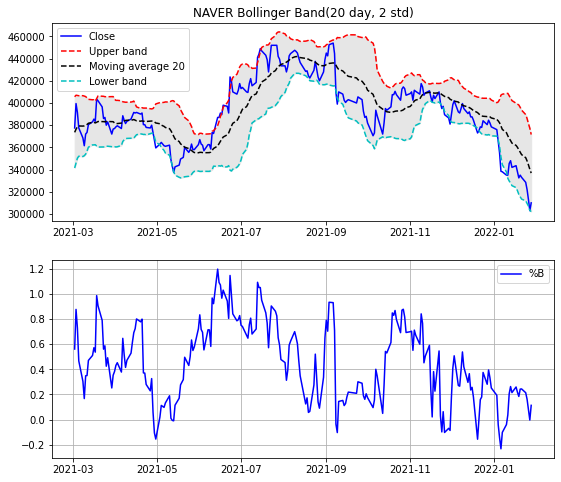

In [8]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)  # ②
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')

plt.subplot(2, 1, 2)  # ③
plt.plot(df.index, df['PB'], color='b', label='%B')  # ④
plt.grid(True)
plt.legend(loc='best')
plt.show()